In [62]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#Import data. 
#Encoded in latin-1 because CSV has characters not compatible with UTF-8
df = pd.read_csv(os.path.join("FIFA_18.csv"), encoding='latin-1')
df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72M,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,$355,...,79,88,68,58,51,15,13,5,10,13


In [64]:
#Clean data. 
df['Value']=df['Value'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df['Height']=df['Height'].replace("'",".", regex=True).astype(float)
df['Weight'] = pd.to_numeric(df['Weight'].astype(str).str[:-3], errors='coerce')

df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,$355,...,79,88,68,58,51,15,13,5,10,13


In [65]:
#Monetary value of each player (in Euros).
target = df["Value"]

In [66]:
#Remove Value column (Value is target data).
#Remove Columns with non-numeric values. 
data = df.drop(["Value","Name","Nationality","Club","Wage","Preferred Foot","Work Rate","Position","Jersey Number","Joined","Contract Valid Until"], axis=1)

#Set column headers as feature names 
feature_names = data.columns
data.head()

#data.to_csv('FIFA_ML_data.csv', index = False)

,No,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,5,4,4,5.70,159,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,33,94,94,5,4,5,6.20,183,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,26,92,93,5,5,5,5.90,150,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,27,91,93,4,3,1,6.40,168,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,27,91,92,4,5,4,5.11,154,...,79,88,68,58,51,15,13,5,10,13


In [67]:
#RandomForestRegressor. Best for analyzing and ranking several features.
rf = RandomForestRegressor(n_estimators=900, random_state = 42)
rf = rf.fit(data, target)
rf.score(data, target)

0.9914698475791098

In [68]:
#Calculate importances.
importances = rf.feature_importances_
importances

array([7.47817786e-01, 1.11353842e-02, 6.08413913e-02, 1.51644273e-03,
       5.04933748e-02, 3.78982324e-04, 1.10127454e-03, 6.39076577e-04,
       1.00343852e-03, 2.27531564e-03, 1.36291575e-03, 1.49962276e-02,
       9.70030533e-04, 1.37285116e-03, 6.36136145e-03, 1.06812580e-02,
       2.16464099e-03, 4.78098351e-03, 9.70041244e-04, 9.02263512e-03,
       2.56204489e-03, 1.65522734e-03, 3.24390426e-03, 1.49316179e-02,
       2.08899224e-03, 2.00163421e-03, 1.36610022e-03, 2.12545493e-03,
       1.56775231e-03, 8.76529169e-03, 1.19453490e-03, 1.06457964e-03,
       4.89400003e-03, 5.85298140e-03, 4.27368354e-03, 2.10147048e-03,
       1.43751810e-03, 1.34373541e-03, 1.77276920e-03, 1.01671579e-03,
       1.13928339e-03, 1.89291358e-03, 1.00712269e-03, 8.15260098e-04])

In [69]:
#Order importances.
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.7478177856983179, 'No'),
 (0.06084139132074998, 'Age'),
 (0.05049337483150512, 'Potential'),
 (0.014996227552804855, 'Finishing'),
 (0.014931617909796491, 'Reactions'),
 (0.011135384179999413, 'ID'),
 (0.010681258049481045, 'Dribbling'),
 (0.00902263511973598, 'BallControl'),
 (0.008765291691522967, 'LongShots'),
 (0.0063613614481979166, 'Volleys'),
 (0.005852981400688347, 'Vision'),
 (0.004894000033246147, 'Positioning'),
 (0.004780983512034024, 'FKAccuracy'),
 (0.004273683536357169, 'Penalties'),
 (0.0032439042561728617, 'Agility'),
 (0.0025620448867823497, 'Acceleration'),
 (0.002275315641715036, 'Weight'),
 (0.0021646409926284484, 'Curve'),
 (0.0021254549280178706, 'Stamina'),
 (0.0021014704779736357, 'Composure'),
 (0.002088992239989553, 'Balance'),
 (0.002001634210757632, 'ShotPower'),
 (0.0018929135755324728, 'GKKicking'),
 (0.0017727692002869396, 'SlidingTackle'),
 (0.0016552273428237464, 'SprintSpeed'),
 (0.0015677523121625924, 'Strength'),
 (0.001516442728244998, 'Overall

In [70]:
#Most significant importances. Excluded "Number(No)", I believe list was partly ordered by player value.
X = data[['Age', 'Potential', 'Finishing', 'Reactions']]
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)

(501, 4) (501, 1)


In [71]:
#Split training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
#Normalize data.
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [73]:
#Create logistic regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

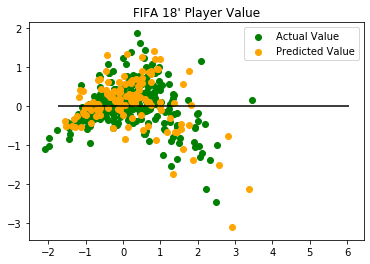

In [74]:
#Plot results
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Actual Value")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Predicted Value")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("FIFA 18' Player Value")
plt.show()

In [75]:
#Train model for linear regression predictions
model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#Validate model
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7479176254735735
Testing Data Score: 0.7344907695400975


In [77]:
#Predict Player Values
predictions = model.predict(X_test)
print(f"First 10 Predicted Player Values:  {np.round(predictions,2)[:10].tolist()}")
print(f"First 10 Actual Player Values: {y_test[:10].tolist()}")

First 10 Predicted Player Values:  [34.22, 31.42, 16.68, 53.52, 27.05, 17.32, 20.28, 41.67, 42.02, 13.69]
First 10 Actual Player Values: [[23.5], [30.0], [18.5], [40.0], [15.5], [21.0], [15.5], [42.0], [43.5], [15.5]]


In [78]:
predictions

array([34.21937618, 31.42266585, 16.68068814, 53.52132797, 27.04763437,
       17.32382116, 20.27715642, 41.66645892, 42.02474064, 13.69205588,
       51.14607112, 24.34895799, 20.32412671, 27.47257143, 16.19528228,
       10.27750066,  9.38302652, 46.86464753, 28.34259675, 19.46567257,
        7.13009164, 10.99686916, 33.1622564 , 17.11475634, 39.68113032,
        3.41351693, 11.39840701, 29.0350764 , 37.09044416, 33.78508348,
       17.62649995, 32.02502118, 29.37553062, 35.6120317 , 71.09443528,
       21.91577448,  8.78227192, 33.50564917, 16.04114689, 44.70548742,
       16.76211611, 33.7684917 , 15.56437367, 22.64499104, 48.78576083,
       47.40067414, 77.92090648, 55.16150835, 34.45693058, 38.15021428,
       34.61814738, 30.06469251, 25.50504503, 19.49455246, 26.74335486,
       53.29195722, 34.11869189, 47.61505384, 30.1945449 , 45.8283848 ,
       10.14383201, 31.95581761, 40.47811053,  6.63406209, 54.41231246,
       37.12656627, 19.86128073, 31.60229966, 32.97138409, 17.31